# Week11 Unsupervised Learning

# 1. K-means clustering 

---
p16

### Make simple data and plotting

In [1]:
from sklearn.datasets import make_blobs

# make simple 2D data
X, y = make_blobs(n_samples=150, 
                  n_features=2,
                  centers=3,
                  cluster_std=0.5,
                  shuffle=True,
                  random_state=0)

X.shape

(150, 2)

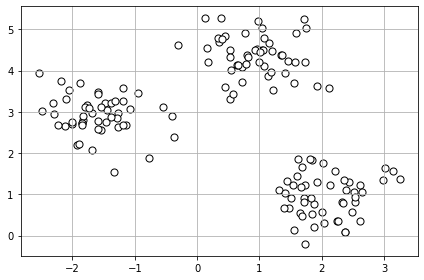

In [2]:
import matplotlib.pyplot as plt

# plotting simple 2D data
plt.scatter(X[:, 0], X[:, 1], 
            c='white', marker='o', edgecolor='black', s=50)
plt.grid()
plt.tight_layout()

plt.show()

---
p17

### Train the K-means model and Plot

In [3]:
from sklearn.cluster import KMeans

# KMeans with k = 2
km = KMeans(n_clusters=2,
           init='random',
           max_iter=300,
           random_state=0)

# cluster assignment
y_km = km.fit_predict(X)
y_km

array([1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1])

In [4]:
# cluster centers
print('<Cluster centers>\n', km.cluster_centers_)

<Cluster centers>
 [[-0.33088235  3.63828839]
 [ 2.06521743  0.96137409]]


---
p18

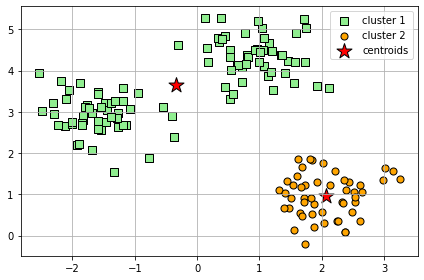

In [5]:
# plotting clusters and centers
plt.scatter(X[y_km == 0, 0],
            X[y_km == 0, 1],
            s=50, c='lightgreen',
            marker='s', edgecolor='black',
            label='cluster 1')
plt.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            s=50, c='orange',
            marker='o', edgecolor='black',
            label='cluster 2')
plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=250, marker='*',
            c='red', edgecolor='black',
            label='centroids')
plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()

plt.show()

---
p19

In [6]:
from sklearn.cluster import KMeans

# KMeans with k = 3
km = KMeans(n_clusters=3,
           init='random',
           max_iter=300,
           random_state=0)

# cluster assignment
y_km = km.fit_predict(X)
y_km

array([2, 1, 1, 1, 2, 1, 1, 2, 0, 1, 2, 0, 0, 1, 1, 0, 0, 2, 0, 2, 1, 2,
       1, 1, 0, 2, 2, 1, 0, 2, 0, 0, 0, 0, 1, 2, 2, 2, 1, 1, 0, 0, 1, 2,
       2, 2, 0, 1, 0, 1, 2, 1, 1, 2, 2, 0, 1, 2, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 0, 0, 1, 2, 2, 1, 1, 2, 2, 2, 0,
       0, 2, 2, 1, 2, 1, 2, 1, 0, 0, 2, 2, 2, 2, 0, 2, 2, 1, 0, 1, 1, 1,
       0, 1, 2, 0, 1, 0, 1, 1, 0, 0, 1, 2, 1, 1, 2, 2, 0, 2, 0, 0, 0, 0,
       2, 0, 0, 0, 1, 0, 2, 0, 1, 1, 2, 2, 0, 0, 0, 0, 2, 2])

In [7]:
# cluster centers
print('<Cluster centers>\n', km.cluster_centers_)

<Cluster centers>
 [[-1.5947298   2.92236966]
 [ 0.9329651   4.35420712]
 [ 2.06521743  0.96137409]]


---
p20

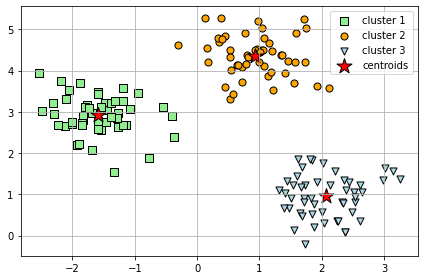

In [8]:
# plotting clusters and centers
plt.scatter(X[y_km == 0, 0],
            X[y_km == 0, 1],
            s=50, c='lightgreen',
            marker='s', edgecolor='black',
            label='cluster 1')
plt.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            s=50, c='orange',
            marker='o', edgecolor='black',
            label='cluster 2')
plt.scatter(X[y_km == 2, 0],
            X[y_km == 2, 1],
            s=50, c='lightblue',
            marker='v', edgecolor='black',
            label='cluster 3')
plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=250, marker='*',
            c='red', edgecolor='black',
            label='centroids')
plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()

plt.show()

---
p28

## Distortion

### Using the elbow method to find the optimal number of clusters

In [9]:
# distortion
print('Distortion when k = 3: %.2f' % km.inertia_)

Distortion when k = 3: 72.48


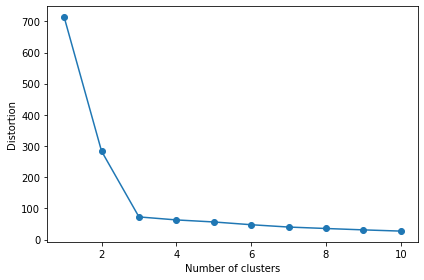

In [10]:
# plotting distortions for k = 1 to 11
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i,
           init='k-means++',
           max_iter=300,
           random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
    
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()

plt.show()

---
p31

## Silhouette Analysis using scikit-learn

### Measuring the quality of clustering via silhouette plots

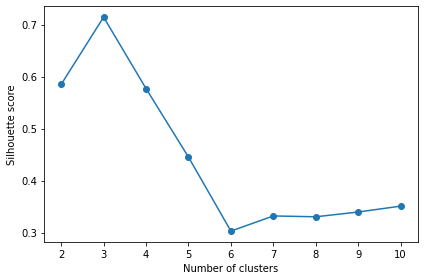

In [11]:
from sklearn.metrics import silhouette_score

# plotting silhouette scores for k = 2 to 11
silhouette_scores = []
for i in range(2, 11):
    km = KMeans(n_clusters=i,
           init='k-means++',
           max_iter=300,
           random_state=0)
    y_km = km.fit_predict(X)
    silhouette_scores.append(silhouette_score(X,y_km,metric='euclidean'))
    
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.tight_layout()

plt.show()

---
p32

### Make simple 3D data and plotting

In [12]:
from sklearn.datasets import make_blobs

# make simple 3D data
X, y = make_blobs(n_samples=250, 
                  n_features=3, 
                  centers=5, 
                  cluster_std=1.5, 
                  shuffle=True, 
                  random_state=1)
X

array([[-3.53629743e+00, -6.02983465e+00, -9.53019216e+00],
       [ 1.81801027e+00, -9.91484955e-01,  3.15589155e+00],
       [-4.32462107e+00, -7.40257340e+00, -7.58369028e+00],
       [ 1.85916632e+00, -9.24290830e-01,  1.72209806e+00],
       [-2.78149052e+00,  3.53529403e+00, -1.01638435e+01],
       [-4.67636968e+00, -2.97755645e+00,  4.29766489e-01],
       [-8.02808319e+00, -1.20932028e+00, -2.57803932e+00],
       [-9.97923558e-01, -2.52376196e+00,  2.57342840e+00],
       [-4.84489985e+00, -3.74014658e+00, -1.87979408e-01],
       [-1.38773851e+00,  5.25300717e+00, -1.08474778e+01],
       [-1.34320686e+00,  5.03915860e+00, -9.12482473e+00],
       [-4.35078957e+00, -5.40395884e+00, -1.01763329e+01],
       [ 1.40348321e+00,  5.07777091e+00, -8.97263616e+00],
       [-7.13593986e+00,  1.20370757e+01, -8.94183386e+00],
       [-7.59973747e+00,  1.02554016e+01, -1.00744634e+01],
       [-6.34932147e+00,  7.32563649e+00, -1.00300465e+01],
       [-5.14718811e+00, -5.98453345e+00

---
p33

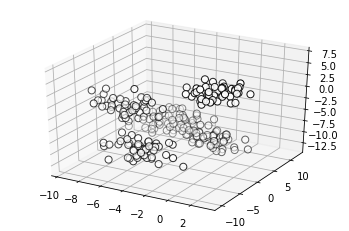

In [13]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# plotting simple 3D data
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

ax.scatter(X[:,0],X[:,1],X[:,2],s=50,c='white',edgecolor='black')
plt.show()

---
p34

### Train the K-means model and Plot

In [14]:
from sklearn.cluster import KMeans

# KMeans with k = 3
km = KMeans(n_clusters=3,
           init='random',
           max_iter=300,
           random_state=0)

# cluster assignment
y_km = km.fit_predict(X)
y_km

array([2, 1, 2, 1, 0, 2, 2, 1, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2,
       2, 2, 2, 0, 2, 1, 2, 0, 0, 1, 1, 0, 2, 1, 0, 1, 0, 2, 2, 2, 2, 2,
       1, 1, 2, 2, 1, 2, 1, 2, 0, 2, 2, 0, 1, 2, 2, 0, 0, 1, 0, 0, 1, 1,
       2, 2, 0, 2, 2, 0, 1, 0, 0, 2, 1, 1, 1, 2, 0, 2, 0, 0, 2, 0, 1, 2,
       0, 2, 2, 1, 0, 1, 2, 0, 2, 2, 2, 0, 2, 1, 0, 1, 0, 1, 2, 0, 2, 0,
       1, 0, 0, 0, 2, 0, 0, 0, 1, 2, 0, 0, 0, 2, 0, 2, 2, 0, 2, 0, 1, 0,
       2, 2, 1, 2, 2, 2, 0, 2, 0, 0, 1, 2, 0, 2, 1, 1, 0, 1, 2, 2, 1, 2,
       2, 2, 1, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 0, 0, 2, 0, 0, 1, 1, 0, 2,
       0, 0, 2, 2, 1, 1, 2, 0, 2, 1, 0, 0, 2, 0, 2, 1, 0, 0, 2, 2, 1, 0,
       2, 1, 2, 0, 1, 2, 0, 0, 2, 0, 2, 0, 0, 1, 0, 0, 2, 2, 2, 0, 0, 0,
       0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 1, 2, 2, 0, 2, 0, 2, 2,
       1, 2, 2, 0, 0, 2, 0, 0])

---
p35

In [15]:
# cluster centers
print('<Cluster centers>\n', km.cluster_centers_)

<Cluster centers>
 [[-3.77533876  6.2491384  -9.738063  ]
 [ 0.6280098  -1.5582504   3.57176575]
 [-5.23518279 -5.00205646 -4.91604603]]


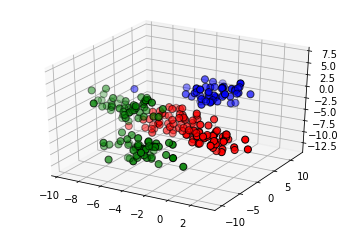

In [16]:
# plotting clusters 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[y_km == 0, 0], X[y_km == 0, 1], X[y_km == 0, 2], 
           s=50, c='red', edgecolor='black')
ax.scatter(X[y_km == 1, 0], X[y_km == 1, 1], X[y_km == 1, 2], 
           s=50, c='blue', edgecolor='black')
ax.scatter(X[y_km == 2, 0], X[y_km == 2, 1], X[y_km == 2, 2], 
           s=50, c='green', edgecolor='black')

plt.show()

---
p36

### Using the elbow method to find the optimal number of clusters

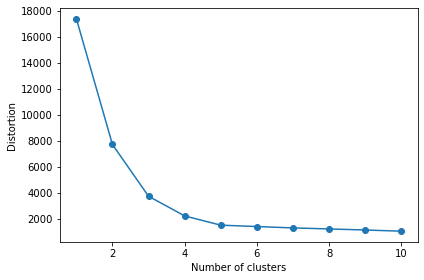

In [17]:
# plotting distortions for k = 1 to 11
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i,
           init='k-means++',
           max_iter=300,
           random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()

plt.show()

---
p37

### Measuring the quality of clustering via silhouette plots

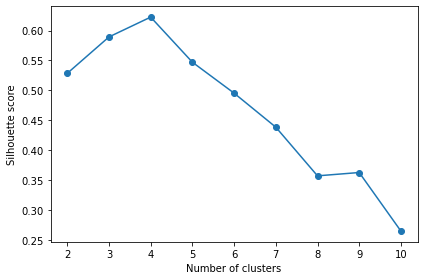

In [18]:
# plotting silhouette scores for k = 1 to 11
silhouette_scores = []
for i in range(2, 11):
    km = KMeans(n_clusters=i,
           init='k-means++',
           max_iter=300,
           random_state=0)
    y_km = km.fit_predict(X)
    silhouette_scores.append(silhouette_score(X,y_km,metric='euclidean'))
    
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.tight_layout()

plt.show()

---
p42

# 2. DBSCAN clustering using scikit-learn

### Make simple data and plotting

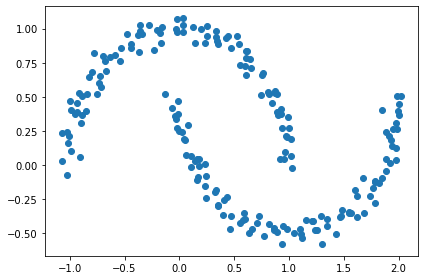

In [19]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

X, y = make_moons(n_samples=200,noise=0.05,random_state=0)
plt.scatter(X[:,0],X[:,1])
plt.tight_layout()

plt.show()

---
p43

### Problem of K-means clustering

In [20]:
from sklearn.cluster import KMeans

# KMeans with k = 2
km = KMeans(n_clusters=2,random_state=0)
y_km = km.fit_predict(X)
y_km

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1])

---
p44

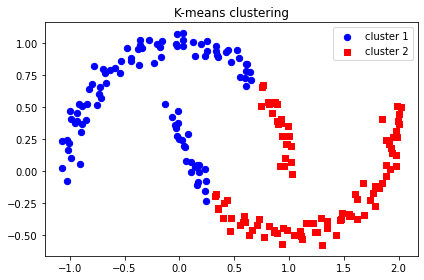

In [21]:
# plotting clusters 
f, (ax1)= plt.subplots(1, 1, figsize=(6, 4))

ax1.scatter(X[y_km == 0, 0], X[y_km == 0, 1],
            c='blue', marker='o', s=40, label='cluster 1')
ax1.scatter(X[y_km == 1, 0], X[y_km == 1, 1],
            c='red', marker='s', s=40, label='cluster 2')
ax1.set_title('K-means clustering')

plt.legend()
plt.tight_layout()

plt.show()

---
p45

### Density based clustering

In [22]:
from sklearn.cluster import DBSCAN

# DBSCAN with eps = 0.2, min_samples = 5
db = DBSCAN(eps=0.2,min_samples=5,metric='euclidean')
y_db = db.fit_predict(X)

y_db

array([0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1], dtype=int64)

---
p46

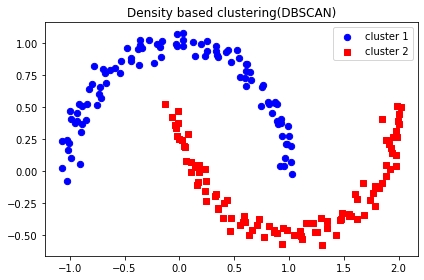

In [23]:
# plotting clusters
plt.scatter(X[y_db == 0, 0], X[y_db == 0, 1],
            c='blue', marker='o', s=40,
            label='cluster 1')
plt.scatter(X[y_db == 1, 0], X[y_db == 1, 1],
            c='red', marker='s', s=40,
            label='cluster 2')
plt.legend()
plt.title('Density based clustering(DBSCAN)')
plt.tight_layout()

plt.show()

---
p47

### Outlier Detection

In [24]:
# make outliers
X[0] = [1,1]
X[1] = [-0.5,-0.5]

In [25]:
# DBSCAN with eps = 0.2, min_samples = 5
db = DBSCAN(eps=0.2,min_samples=5,metric='euclidean')
y_db = db.fit_predict(X)

y_db

array([-1, -1,  0,  1,  0,  0,  1,  0,  1,  0,  1,  0,  0,  0,  1,  1,  1,
        0,  1,  1,  0,  0,  1,  0,  1,  0,  0,  0,  0,  1,  1,  1,  0,  0,
        1,  0,  0,  1,  1,  0,  0,  1,  1,  0,  0,  1,  1,  1,  0,  0,  1,
        0,  0,  1,  0,  1,  1,  0,  1,  1,  0,  1,  0,  1,  0,  1,  1,  0,
        1,  1,  0,  1,  0,  0,  0,  1,  0,  1,  1,  0,  0,  1,  0,  0,  0,
        1,  1,  1,  0,  0,  1,  1,  0,  1,  0,  0,  0,  0,  1,  0,  0,  0,
        1,  1,  1,  0,  1,  1,  0,  1,  1,  1,  1,  1,  1,  0,  1,  0,  0,
        1,  1,  1,  0,  1,  0,  1,  1,  0,  0,  0,  1,  1,  1,  0,  0,  0,
        0,  1,  0,  1,  0,  0,  1,  1,  1,  1,  0,  0,  1,  0,  0,  0,  1,
        1,  0,  1,  0,  0,  1,  1,  0,  0,  1,  0,  0,  0,  1,  0,  0,  0,
        1,  1,  1,  1,  0,  0,  0,  1,  1,  1,  0,  1,  0,  0,  0,  1,  1,
        0,  1,  1,  1,  1,  1,  1,  0,  1,  0,  0,  1,  0], dtype=int64)

---
p48

In [26]:
# find data that is not clustered (-1) - outlier
outlier_idxs = (y_db==-1)
X[outlier_idxs]

array([[ 1. ,  1. ],
       [-0.5, -0.5]])

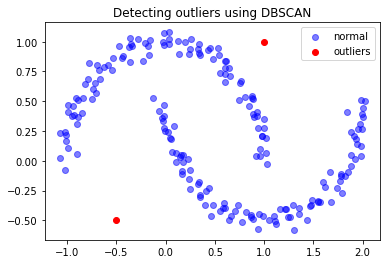

In [27]:
# plotting outliers
plt.scatter(X[~outlier_idxs,0],
           X[~outlier_idxs,1],
           alpha=0.5,color='b',label='normal')
plt.scatter(X[outlier_idxs,0],
           X[outlier_idxs,1],
           color='r',label='outliers')
plt.legend()
plt.title("Detecting outliers using DBSCAN")
plt.show()

---
p50

# Quiz 1 : K-means Clustering

### Figure out the data structure of unlabeled data


- **Motor Trend Dataset(mtcars)**  
   - The data was extracted from the 1974 Motor Trend US magazine, and comprises fuel consumption and 10 aspects of automobile design and performance for 32 automobiles (1973â€“74 models).
  - https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/mtcars.html



- **Goal** :
    - We would like to recommend the products that meet the needs of customers by classifying the cars in the list into several clusters according to their features.
    - After clustering, Explain each cluster based on its features


- **Categorical feature** :
   - **Nominal feature**
      - vs : Engine(0 = V-shaped, 1 = straight)
      - am : Transmission(0 = automatic, 1 = manual)



- **Numeric feature**  
    - mpg : Miles/US Gallon, the determinant of fuel efficiency
    - cyl : Number of cylinders
    - disp : Displacement (cu.in.)
    - hp : Gross horsepower 
    - drat : Rear axle ratio
    - wt : Weight (1000 lbs)
    - qsec : 1/4 mile time
    - gear : Number of forward gears
    - carb : Number of carburetors


- We will use 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec' features.

### Load the dataset

In [28]:
import pandas as pd
import numpy as np

df = pd.read_csv("cars.csv")

In [29]:
df.head()

Unnamed: 0   mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  \
0          Mazda RX4  21.0    6  160.0  110  3.90  2.620  16.46   0   1     4   
1      Mazda RX4 Wag  21.0    6  160.0  110  3.90  2.875  17.02   0   1     4   
2         Datsun 710  22.8    4  108.0   93  3.85  2.320  18.61   1   1     4   
3     Hornet 4 Drive  21.4    6  258.0  110  3.08  3.215  19.44   1   0     3   
4  Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   0     3   

   carb  
0     4  
1     4  
2     1  
3     1  
4     2

In [30]:
# select 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec' features.
df_num = None

### Standardization and Demensionality reduction

In [31]:
# standardizing the data
from sklearn.preprocessing import StandardScaler
sc = None
X = None

In [32]:
# apply PCA to the data - n_components=2
from sklearn.decomposition import PCA
pca = None
X_pca = None

In [33]:
#explained variance
None

### Using the elbow method to find the optimal number of clusters

ValueError: x and y must have same first dimension, but have shapes (10,) and (0,)

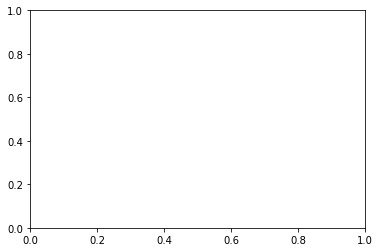

In [34]:
# Find appropriate k value by plotting distortions for k = 1 to 11
distortions = []
for i in range(1, 11):
    km = None
    None
    None
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()

plt.show()

### Quantifying the quality of clustering via silhouette plots

In [ ]:
# plotting silhouette scores for k = 1 to 11
silhouette_scores = []
for i in range(2, 11):
    km = None
    None
    None
    
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.tight_layout()

plt.show()

### Train the K-means model and Plot

In [ ]:
from sklearn.cluster import KMeans
# Set n_clusters=k, which have been found  
km = None

y_km = None
y_km

### PCA Biplot
- The cosine of the angle between a vector and an axis indicates the importance of the contribution of the corresponding variable to the principal component.
- The cosine of the angle between pairs of vectors indicates correlation between the corresponding variables. Highly correlated variables point in similar directions; uncorrelated variables are nearly perpendicular to each other.
- https://blogs.sas.com/content/iml/2019/11/06/what-are-biplots.html

In [ ]:
# https://stackoverflow.com/questions/39216897/plot-pca-loadings-and-loading-in-biplot-in-sklearn-like-rs-autoplot
from matplotlib import cm

def biplot(score,coeff,labels=None, y_km=None):
    plt.figure(figsize=(5,5))
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    n_km = np.unique(y_km).shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    for k in range(n_km):
        color = np.array(cm.jet(float(k) / n_km)).reshape(1,-1)
        plt.scatter(xs[y_km==k] * scalex,
                    ys[y_km==k] * scaley,
                    c = color, label="Cluster "+str(k+1))

    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],
                  color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15,
                     "Var"+str(i+1), color = 'red',
                     ha = 'center', va = 'center', size=10)
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15,
                     labels[i], color = 'red',
                     ha = 'center', va = 'center', size=10)
    plt.xlim(xs.min()* scalex-0.6,xs.max()* scalex+0.6)
    plt.ylim(ys.min()* scalex-0.6,ys.max()* scalex+0.6)

    plt.legend()
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

In [ ]:
# Call the biplot function. Use only the 2 PCs.
biplot(X_pca[:, 0:2], np.transpose(pca.components_[0:2, :]), df_num.columns, y_km)
plt.show()

### Explain each cluster
  - Cluster 0 : 
  - Cluster 1 : 

# Quiz 2 : DBSCAN
### Detecting outliers using DBSCAN
- **Goal** : Detect & Remove outliers from the iris dataset

### Load the dataset

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

df_X = pd.DataFrame(X, columns=iris.feature_names)
df_y = pd.DataFrame(y, columns=["target"])
df = pd.concat([df_X, df_y], axis=1)
df.head()

### Split the data set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=1)

In [ ]:
import matplotlib.pyplot as plt
# Check the scatter plot - feature 1 and 2
plt.scatter(X_train[:,1],X_train[:,2])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Length")
plt.grid()
plt.show()

### Detecting outliers using DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

# Make and fit a DBSCAN object 
# Find appropriate parameters(eps, min_samples)
dbsc = None
y_db = None

In [ ]:
# check the labels, -1 means outlier
y_db

In [ ]:
# find data that is not clustered (-1) - outlier
outlier_idxs = None
X_train[outlier_idxs]

In [ ]:
# plotting outliers in feature 1 and 2
None
None
plt.legend()
plt.xlabel("Sepal Width")
plt.ylabel("Petal Length")

plt.grid()
plt.title("Detecting outliers using DBSCAN")
plt.show()